### Dataset Information

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Attribute Information:

Input variables (based on physicochemical tests):
<ol>
    <li> - fixed acidity </li>
    <li> - volatile acidity</li> 
    <li> - citric acid</li>
    <li> - residual sugar </li>
    <li> - chlorides</li>
    <li> - free sulfur dioxide</li>
    <li> - total sulfur dioxide</li>
    <li> - density</li>
    <li> - pH</li>
    <li> - sulphates</li>
    <li> - alcohol</li>
    <li> - quality (score between 0 and 10) --> Output variable (based on sensory data)</li>
</ol>

In [89]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
#loading the datasets
red_wine = pd.read_csv("winequality-red.csv", sep=';')
white_wine = pd.read_csv("winequality-white.csv", sep=';')

In [91]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


###  Asking questions
<ul>
    <li> What chemical characteristics are most important in predicting the quality of  wine?</li>
    <li> Is a certain type of wine (red or white) associated with higher quality?</li>
    <li> Do wines with higher alcoholic content receive higher ratings?</li>
    <li> Do sweeter wines (more residual sugar) receive higher ratings?</li>
    <li> What level of acidity is associated with the highest quality? </li>
    
</ul>

### Assesssing

In [93]:
red_wine.shape

(1599, 12)

In [94]:
white_wine.shape

(4898, 12)

In [95]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [96]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Checking Duplicate values**

In [16]:
sum(red_wine.duplicated())

240

In [17]:
sum(white_wine.duplicated())

937

**Checking number of unique values in each column**

In [18]:
red_wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [19]:
white_wine.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [20]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


To analyze data more efficiently we can combine both the dataframes into one dataframe. But after combining them we will not be able to distinguish between them . In order to do that , add a new column to each dataframe indicating whether the wine is red or white .<br><br> Creating columns of the length equal to number of rows in each dataframe 

In [24]:
red_color = np.repeat("red",red_wine.shape[0])
white_color = np.repeat("white",white_wine.shape[0])

Adding created columns to each of the dataframe

In [25]:
red_wine['color']=red_color
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [27]:
white_wine['color']=white_color
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


Adding two existing dataframe to create a new dataframe using pandas **append()** function

In [30]:
wine_df = red_wine.append(white_wine)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [31]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


Checking whether all the data in both the dataframes are there in the new created dataframe

In [32]:
wine_df.shape

(6497, 13)

In [33]:
red_wine.shape[0]+white_wine.shape[0]

6497

<b>Let find out the answers of our questions by inferential statistics and visualizing our data<b>

### EDA

Q1. What chemical characteristics are most important in predicting the quality of wine?

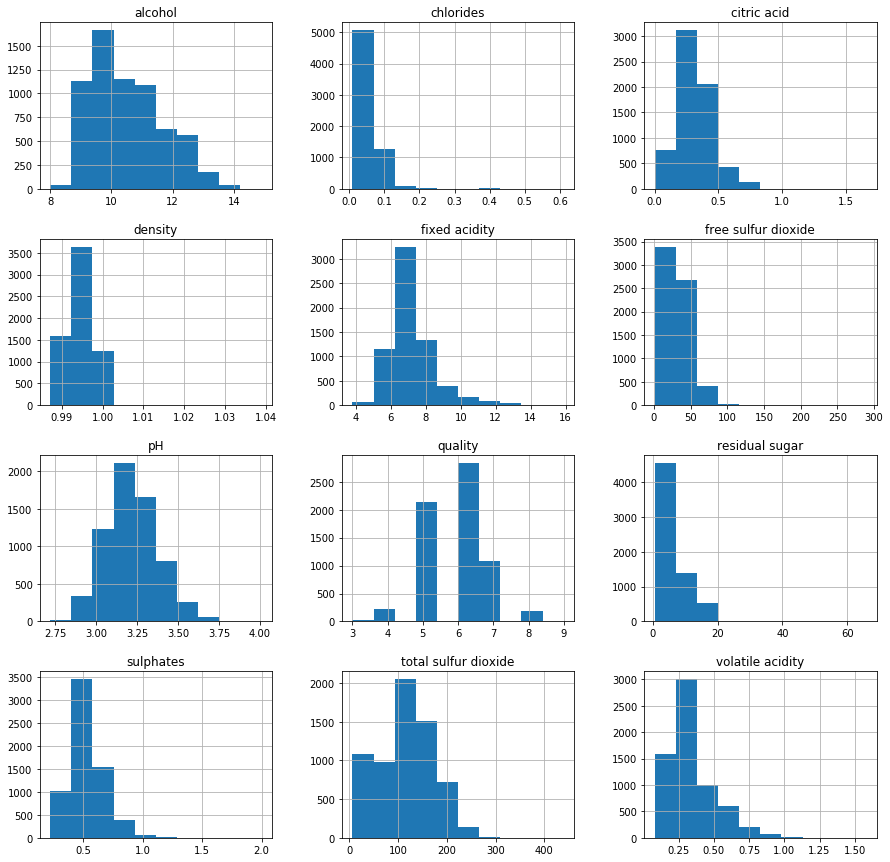

In [34]:
wine_df.hist(figsize=(15,15));

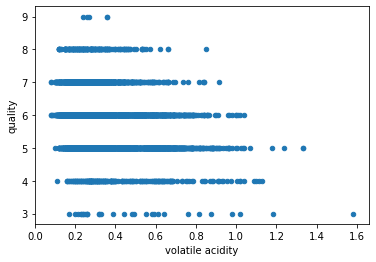

In [36]:
wine_df.plot(x="volatile acidity", y="quality", kind="scatter");

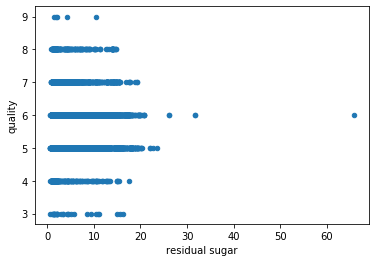

In [37]:
wine_df.plot(x="residual sugar", y="quality", kind="scatter");

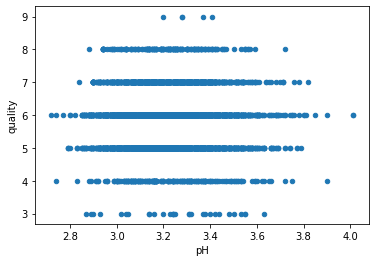

In [38]:
wine_df.plot(x="pH", y="quality", kind="scatter");

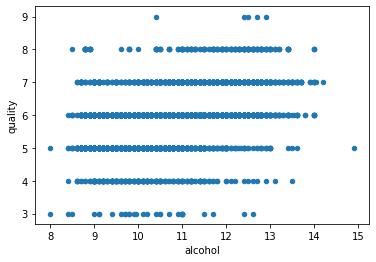

In [39]:
wine_df.plot(x="alcohol", y="quality", kind="scatter");

Based on scatterplots of quality against different feature variables **alcohol** has most likely to have a positive impact on quality.

#####  Is a certain type of wine (red or white) associated with higher quality?
We compare the average quality of red wine with the average quality of white wine with pandas groupby. To do this we can group by color and then find the mean quality of each group.

In [101]:
wine_df.groupby('color',as_index=False).mean()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
1,white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


By looking at the mean value of **quality** it is quite clear that white wine (5.877909) get slightly higher quality than red wine (5.636023)

##### What level of acidity (pH value) receives the highest average rating?
Here, pH is a quantitative variable without clear categories. To convert it to a categorical variable from a quantitative variable we can  create our own categories. pandas **cut** function let's  "cut" data in groups. Using this, we create a new column called acidity_levels with these categories:

**Acidity Levels:**
<ol>
    <li> High: Lowest 25% of pH values </li>
    <li> Moderately High: 25% - 50% of pH values</li>
    <li> Medium: 50% - 75% of pH values</li>
    <li> Low: 75% - max pH value </li>
</ol>



Here, the data is being split at the 25th, 50th, and 75th percentile. We can get these numbers with pandas **describe()** function.

In [47]:
wine_df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [48]:
bins=[2.72,3.11,3.21,3.32,4.01]
bin_lables=['high','mod_high','medium','low']

In [52]:
wine_df["acidity_levels"]=pd.cut(wine_df.pH, bins, labels=bin_lables)

In [53]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acitidy_levels,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low,low


Now using group by on **acidity_levels** we can get the levels of pH value that affects the quality of the wine

In [83]:
wine_df.groupby("acidity_levels").mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

From the mean value we can see that low pH value results in higher quality wine

##### Do wines with higher alcoholic content receive higher ratings?

To find the answer of this question, we can divide our dataframe into two dataframes indicating one as low alcohol content and another one as high alcohol content. This partition value we can get from the median of the alcohol. 

**Mean vs Median**

Both are measures of where the center of a data set lies, but they are usually different numbers. For example, take this list of numbers: 10, 10, 20, 40, 70.
<ul>
    <li>The mean (average) is found by adding all of the numbers together and dividing by the number of items in the set: 10 + 10 + 20 + 40 + 70 / 5 = 30.</li>
    <li>The median is found by ordering the set from lowest to highest and finding the exact middle. The median is just the middle number: 20.</li>
</ul>
Sometimes the two will be the same number. For example, the data set 1, 2, 4, 6, 7 has an average of 1 + 2 + 4 + 6 + 7 / 5 = 4 and a median (a middle) of 4.

##### Calculating median

The median is the middle number in a data set. To find the median, list your data points in ascending order and then find the middle number. The middle number in this set is 28 as there are 4 numbers below it and 4 numbers above:
23, 24, 26, 26, 28, 29, 30, 31, 33

**Note:** If you have an even set of numbers, average the middle two to find the median. For example, the median of this set of numbers is 28.5 (28 + 29 / 2).
23, 24, 26, 26, 28, 29, 30, 31, 33, 34

In [129]:
sorted_data=sorted(wine_df.alcohol)

Finding the middle point in our sorted_data

In [133]:
len(sorted_data)

6497

In [132]:
len(sorted_data)//2

3248

So choosing the index position equally divides our data and that is the index we are looking for median value 

In [134]:
sorted_data[3249]

10.3

Fortuanetly pandas dataframe has inbuilt **median()** function which do this job for us 

In [67]:
wine_df.alcohol.median()

10.3

Consider less than median value as low alcohol quantity and remaining value as high alcohol quantity . And create two separate dataframe using this partition value with pandas **query()** function. We can also get this dataframes using masking.

In [69]:
low_alcohol = wine_df.query('alcohol < 10.3')


high_alcohol = wine_df.query('alcohol >= 10.3')

In [70]:
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

 From the above observation, it is clear that wine with high alcohol quantity results in higher quality

##### Do sweeter wines (more residual sugar) receive higher ratings?
We can get the answer of this question by following previous steps

In [72]:
wine_df["residual sugar"].median()

3.0

In [73]:
low_sugar=wine_df[wine_df["residual sugar"]<3.00]

high_sugar=wine_df[wine_df["residual sugar"]>=3.00]

In [74]:
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

From the above observation, it is clear that wine with high sugar quantity results in higher quality

### Now visualizing our findings

In [135]:
mean_quality_low, mean_quality_high = low_alcohol.quality.mean(), high_alcohol.quality.mean()

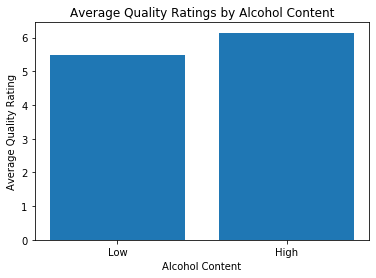

In [76]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

From the above graph, it is clear that wine with high alcohol quantity results in higher quality which is same as our previos information

In [77]:
mean_quality_low, mean_quality_high =low_sugar.quality.mean(), high_sugar.quality.mean()

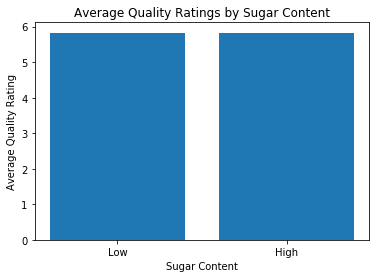

In [84]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');

From the above graph, it is clear that wine with high sugar quantity results in higher quality

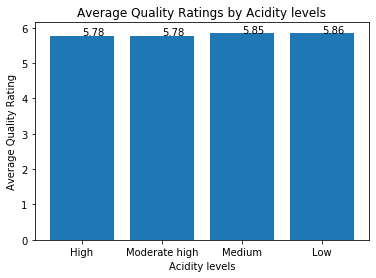

In [146]:
locations = [1,2,3,4]
heights = list(round(wine_df.groupby("acidity_levels").mean().quality,2))

labels = ['High','Moderate high','Medium','Low']

plt.bar(locations, heights, tick_label=labels)

for i in range(len(heights)):
    plt.annotate(str(heights[i]), xy=(locations[i],heights[i]))
plt.title('Average Quality Ratings by Acidity levels')
plt.xlabel('Acidity levels')
plt.ylabel('Average Quality Rating');

From the graph, we can see that low pH value results in higher quality wine